In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
import feather
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
import time
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [5]:
df_raw = pd.read_csv("D:/Kaggle/IndiaML Hiring AV/Data/train.csv",low_memory=False,parse_dates=['origination_date','first_payment_date'])

In [7]:
df_raw.head().T

,0,1,2,3,4
loan_id,268055008619,672831657627,742515242108,601385667462,273870029961
source,Z,Y,Z,X,X
financial_institution,"Turner, Baldwin and Rhodes","Swanson, Newton and Miller",Thornton-Davis,OTHER,OTHER
interest_rate,4.25,4.875,3.25,4.75,4.75
unpaid_principal_bal,214000,144000,366000,135000,124000
loan_term,360,360,180,360,360
origination_date,2012-03-01 00:00:00,2012-01-01 00:00:00,2012-01-01 00:00:00,2012-02-01 00:00:00,2012-02-01 00:00:00
first_payment_date,2012-05-01 00:00:00,2012-03-01 00:00:00,2012-03-01 00:00:00,2012-04-01 00:00:00,2012-04-01 00:00:00
loan_to_value,95,72,49,46,80
number_of_borrowers,1,1,1,2,1


In [6]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [ ]:
display_all(df_raw.tail().T)

In [ ]:
display_all(df_raw.describe(include='all').T)

Creating all the datetime features using add_datepart in FastAi also converting text features to categorical

In [ ]:
add_datepart(df_raw,'origination_date')

In [ ]:
add_datepart(df_raw,'first_payment_date')

In [ ]:
df_raw.origination_Day.value_counts()

In [ ]:
df_raw.first_payment_Day.value_counts()

In [ ]:
train_cats(df_raw)

In [ ]:
df_raw.source.cat.categories

In [ ]:
df_raw.financial_institution.cat.categories

In [ ]:
df_raw.loan_purpose.cat.categories

In [ ]:
df_raw.source = df_raw.source.cat.codes
df_raw.financial_institution=df_raw.financial_institution.cat.codes
df_raw.loan_purpose = df_raw.loan_purpose.cat.codes

In [ ]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

In [ ]:
df_raw.to_feather('tmp\loan-raw')

In [4]:
df_raw = feather.read_dataframe("C:/Kaggle/tmp/loan-raw")

In [8]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_id,116058,NaN,NaN,NaN,5.49416e+11,2.59756e+11,1.00001e+11,3.24466e+11,5.48624e+11,7.74303e+11,9.99997e+11
source,116058,NaN,NaN,NaN,0.575971,0.704715,0,0,0,1,2
financial_institution,116058,NaN,NaN,NaN,6.51721,4.4509,0,1,8,8,18
interest_rate,116058,NaN,NaN,NaN,3.86896,0.46102,2.25,3.5,3.875,4.125,6.75
unpaid_principal_bal,116058,NaN,NaN,NaN,208226,114685,11000,120000,183000,278000,1.2e+06
loan_term,116058,NaN,NaN,NaN,292.281,89.7624,60,180,360,360,360
loan_to_value,116058,NaN,NaN,NaN,67.4319,17.2917,6,57,72,80,97
number_of_borrowers,116058,NaN,NaN,NaN,1.59319,0.491242,1,1,2,2,2
debt_to_income_ratio,116058,NaN,NaN,NaN,30.7423,9.7308,1,23,31,39,64
borrower_credit_score,116058,NaN,NaN,NaN,769.927,42.2107,0,751,782,800,840


In [13]:
df_raw.loan_term.value_counts()

360    71812
180    28584
120     7061
240     6749
300      912
96       178
156       92
144       73
336       64
324       53
168       40
348       33
108       29
276       22
84        21
312       19
132       19
216       16
121       14
288       13
264       13
228        8
150        7
162        6
60         6
166        5
153        5
163        4
158        4
165        4
       ...  
91         1
219        1
347        1
100        1
220        1
93         1
157        1
349        1
94         1
290        1
223        1
280        1
295        1
359        1
172        1
274        1
351        1
83         1
275        1
174        1
110        1
85         1
88         1
149        1
341        1
86         1
171        1
278        1
107        1
319        1
Name: loan_term, Length: 140, dtype: int64

In [13]:
df,y,nas = proc_df(df_raw,'m13')

In [422]:
len(df_raw.columns)

53

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [15]:
scaler = MinMaxScaler(feature_range=[0,1])
data_rescaled = scaler.fit_transform(df)

In [16]:
data_rescaled.shape

(116058, 52)

In [17]:
pca = PCA().fit(data_rescaled)

Using the PCA Covariance plot we come to know that maximum variance in the data is Explained by 12 features and we have 52

In [20]:
pca = PCA(n_components=12)

In [21]:
dataset = pca.fit_transform(data_rescaled)

In [22]:
dataset.shape

(116058, 12)

In [23]:
df_pca = pd.DataFrame(data=dataset[0:,0:],index=[i for i in range(dataset.shape[0])],
          columns=['f'+str(i) for i in range(dataset.shape[1])])

Converting all the PCA output to dataframe for training but we will know later PCA leads to a huge information loss and that will be someting we will learn

In [24]:
df_pred = df_raw['m13']

In [25]:
df_pca = pd.concat([df_pca,df_pred],axis=1)

In [29]:
df_pca.m13.value_counts()

0    115422
1       636
Name: m13, dtype: int64

the data is highly imbalanced so we will try and do undersampling and Oversampling to make data balanced but in the we will come to know its best to use the boosting models as or the parameter 'class_weight= Balanced'

In [101]:
y1 = df_pca['m13']

In [86]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

Using TensorFlow backend.


In [76]:
df_pcaf,y1,nas = proc_df(df_pca,'m13') 

In [31]:
number_records_fraud = len(df_pca[df_pca.m13 == 1])
fraud_indices = np.array(df_pca[df_pca.m13 == 1].index)
normal_indices = df_pca[df_pca.m13 == 0].index
random_normal_indices = np.random.choice(normal_indices,636,replace=False)
random_normal_indices = np.array(random_normal_indices)
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
under_sample_data = df_pca.iloc[under_sample_indices,:]

X_undersample = under_sample_data.ix[:, under_sample_data.columns != 'm13']
y_undersample = under_sample_data.ix[:, under_sample_data.columns == 'm13']

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


In [32]:
under_sample_data1,y,nas=proc_df(under_sample_data,'m13')

In [38]:
under_sample_data.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,m13
0,-1.065128,0.870923,1.456414,0.697345,0.623598,0.226099,0.320757,0.708610,0.419173,-0.097793,-0.253287,0.168476,1
1,1.477816,0.817843,0.085836,0.066143,0.160320,0.012553,-0.138945,0.506071,-0.201579,0.038479,0.186260,-0.008526,1
2,1.474749,0.750329,0.099928,-0.209002,0.478641,0.766072,-0.200031,0.468074,-0.131880,0.036129,0.025964,0.112832,1
3,-1.069207,-0.372419,-0.426419,0.224572,-0.248311,-0.189217,-0.059954,0.080861,-0.292091,0.027379,0.185777,0.203115,1
4,-1.045791,0.937441,-0.359997,0.552215,-0.339976,-0.032536,0.309174,0.100200,-0.164916,0.018219,0.180430,-0.079572,1


In [33]:
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.m13 == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.m13 == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  1272


In [49]:
t0 = time.time()
X_reduced_tsne = TSNE(n_components=3,random_state=42).fit_transform(under_sample_data1.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))
# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=3, random_state=42).fit_transform(under_sample_data1.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=3, algorithm='randomized', random_state=42).fit_transform(under_sample_data1.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 2.5e+01 s
PCA took 0.004 s
Truncated SVD took 0.003 s


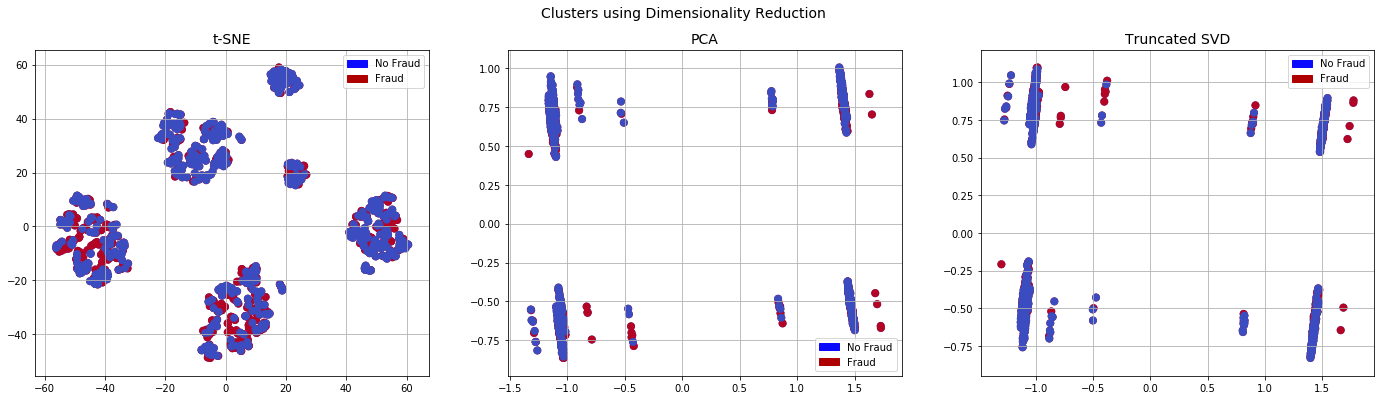

In [48]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

Using TSNE,PCA AND SVD TO see the distribution of data and how it correlates with each other dont really get much info here

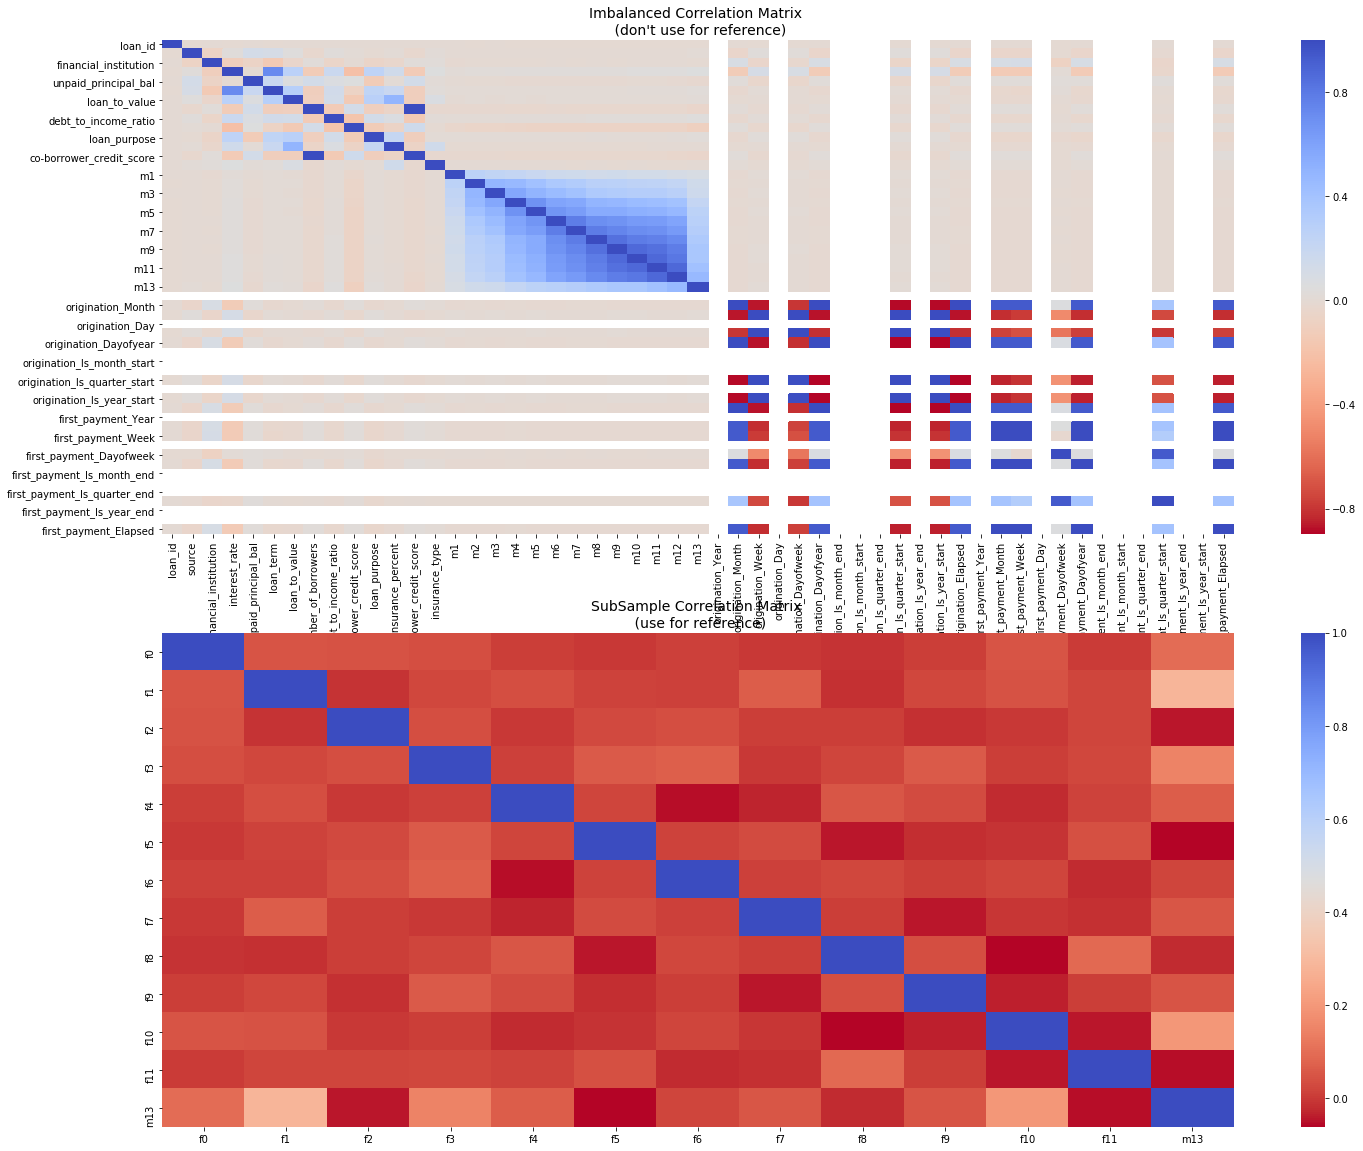

In [43]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# # Entire DataFrame
corr = df_raw.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = under_sample_data.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

Correlation Plots to see the correlations between the variables as if the variables are highly correlated with target variable it causes a lot of problems

In [51]:
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.2
                                                                                                   ,random_state = 8)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))


Number transactions train dataset:  1017
Number transactions test dataset:  255
Total number of transactions:  1272


In [52]:
X_train_undersample.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11
11193,1.465186,0.680651,0.082950,-0.678589,-0.357827,0.191025,0.202915,-0.034439,-0.048090,0.032755,-0.025470,0.144109
8,-1.067840,0.834743,1.413998,0.567096,-0.235647,-0.147422,0.141404,-0.383275,-0.114411,-0.109141,0.050675,-0.086352
11254,-0.863333,-0.634691,0.973320,-0.466039,0.164980,0.404230,0.145963,-0.088938,0.115950,0.127830,0.003110,0.001829
4168,1.484511,0.818457,0.037504,0.088641,0.229156,-0.120059,-0.052608,-0.249266,-0.112652,0.006968,-0.055328,-0.027537
96372,-1.084406,0.700656,1.478809,-0.235273,-0.443043,0.545907,-0.379850,0.206723,-0.026979,-0.070087,0.077960,0.038157


In [53]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

In [55]:
c_param = [0.01,0.1,1,5,10,100]
for x in c_param:
    m = LogisticRegression(C=x,dual=True)
    m.fit(X_train_undersample,y_train_undersample)
#     print(recall_score(y_train_undersample,m.predict(X_train_undersample)))
    print(recall_score(y_test_undersample,m.predict(X_test_undersample)))

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7142857142857143


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7285714285714285


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7357142857142858


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7357142857142858


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7357142857142858


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.55


In [96]:
X_train, X_test, y_train, y_test = train_test_split(df_pcaf,y1,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions train dataset:  81240
Number transactions test dataset:  34818
Total number of transactions:  116058


In [104]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [102]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.model_selection import KFold, StratifiedKFold
# sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(df_pcaf, y1):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = df_pcaf.iloc[train_index], df_pcaf.iloc[test_index]
    original_ytrain, original_ytest = y1.iloc[train_index], y1.iloc[test_index]
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [   128    129    130 ... 116055 116056 116057] Test: [    0     1     2 ... 23718 23719 23720]
Train: [     0      1      2 ... 116055 116056 116057] Test: [  128   129   130 ... 46803 46804 46805]
Train: [     0      1      2 ... 116055 116056 116057] Test: [  255   256   257 ... 69887 69888 69889]
Train: [     0      1      2 ... 116055 116056 116057] Test: [  382   383   384 ... 92971 92972 92973]
Train: [    0     1     2 ... 92971 92972 92973] Test: [   509    510    511 ... 116055 116056 116057]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99 0.01]
[0.99 0.01]


Using CrossValidation first time to make model more stable

In [105]:
print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 92847 | Length of y (train): 92847
Length of X (test): 23211 | Length of y (test): 23211


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.


---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.6538606511348993
precision: 0.010338439780916576
recall: 0.6560861968549796
f1: 0.020356081867131583
---------------------------------------------------------------------------------------------------------------------------------------


In [106]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.66      0.79     23084
       Fraud       0.01      0.68      0.02       127

    accuracy                           0.66     23211
   macro avg       0.50      0.67      0.41     23211
weighted avg       0.99      0.66      0.79     23211



In [108]:
from sklearn.metrics import average_precision_score

In [109]:
y_score = best_est.decision_function(original_Xtest)
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.01


Using SMOTE as the UnderSampling didnt work as expected too less data and very less or little variation there

In [110]:
sm = SMOTE(ratio='minority', random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_sample(original_Xtrain, original_ytrain)

In [112]:
t0 = time.time()
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting oversample data took :0.7903594970703125 sec


In [116]:
y_pred_log_reg = log_reg_sm.predict(X_test)
print(classification_report(y_test, y_pred_log_reg))

# fig, ax = plt.subplots(2, 2,figsize=(22,12))
# sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
# ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
# ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
# ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

              precision    recall  f1-score   support

           0       1.00      0.65      0.79     34633
           1       0.01      0.68      0.02       185

    accuracy                           0.65     34818
   macro avg       0.50      0.67      0.41     34818
weighted avg       0.99      0.65      0.79     34818



In [78]:
# c_param = [0.01,0.1,1,5,10,100]
# for x in c_param:
m = LogisticRegression(C=1,dual=True)
m.fit(X_train_undersample,y_train_undersample)
print(recall_score(y_test_undersample,m.predict(X_test_undersample)))

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7357142857142858


In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [83]:
print(classification_report(y_train,m.predict(X_train)))
print(roc_auc_score(y_train,m.predict(X_train)))
L_r = confusion_matrix(y_train,m.predict(X_train))
np.set_printoptions(precision=2)

              precision    recall  f1-score   support

           0       1.00      0.65      0.79     80789
           1       0.01      0.67      0.02       451

    accuracy                           0.65     81240
   macro avg       0.50      0.66      0.40     81240
weighted avg       0.99      0.65      0.78     81240

0.6611562862598005


In [80]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')

Recall metric in the testing dataset:  0.6718403547671841


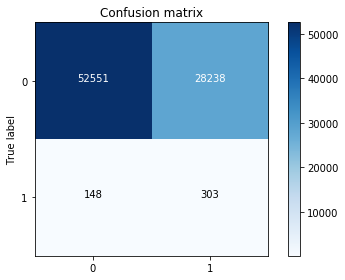

In [81]:
print("Recall metric in the testing dataset: ", L_r[1,1]/(L_r[1,0]+L_r[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(L_r
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

OurPredictions dont look good as seen from the confusion matrix as pca just doesnt work well here

In [62]:
df_test = pd.read_csv("C:/Kaggle/Test.csv",low_memory=False,parse_dates=['origination_date','first_payment_date'])

In [63]:
df_test.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,2012-01-02,2012-01-04,75,1,...,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,2012-01-02,2012-01-04,80,2,...,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,2012-01-01,2012-01-03,75,1,...,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,2012-01-02,2012-01-04,41,2,...,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,2012-01-02,2012-01-04,53,2,...,0,0,0,0,0,0,0,0,0,0


In [64]:
add_datepart(df_test,'first_payment_date')
add_datepart(df_test,'origination_date')
train_cats(df_test)
df_test.source = df_test.source.cat.codes
df_test.financial_institution=df_test.financial_institution.cat.codes
df_test.loan_purpose = df_test.loan_purpose.cat.codes

In [9]:
df_test.to_feather('tmp\loan-test')

NameError: name 'df_test' is not defined

In [10]:

df_test = feather.read_dataframe("C:/Kaggle/tmp/loan-test")

In [11]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_id,116058,NaN,NaN,NaN,5.49416e+11,2.59756e+11,1.00001e+11,3.24466e+11,5.48624e+11,7.74303e+11,9.99997e+11
source,116058,NaN,NaN,NaN,0.575971,0.704715,0,0,0,1,2
financial_institution,116058,NaN,NaN,NaN,6.51721,4.4509,0,1,8,8,18
interest_rate,116058,NaN,NaN,NaN,3.86896,0.46102,2.25,3.5,3.875,4.125,6.75
unpaid_principal_bal,116058,NaN,NaN,NaN,208226,114685,11000,120000,183000,278000,1.2e+06
loan_term,116058,NaN,NaN,NaN,292.281,89.7624,60,180,360,360,360
loan_to_value,116058,NaN,NaN,NaN,67.4319,17.2917,6,57,72,80,97
number_of_borrowers,116058,NaN,NaN,NaN,1.59319,0.491242,1,1,2,2,2
debt_to_income_ratio,116058,NaN,NaN,NaN,30.7423,9.7308,1,23,31,39,64
borrower_credit_score,116058,NaN,NaN,NaN,769.927,42.2107,0,751,782,800,840


In [67]:
cols = []
for col in df_test.columns[27:54]:
    cols.append(col)
for x in cols:
    print(df_test[x].value_counts())

1    35866
Name: first_payment_Month, dtype: int64
1    35866
Name: first_payment_Week, dtype: int64
4    16551
3    14661
5     4510
2      144
Name: first_payment_Day, dtype: int64
2    16551
1    14661
3     4510
0      144
Name: first_payment_Dayofweek, dtype: int64
4    16551
3    14661
5     4510
2      144
Name: first_payment_Dayofyear, dtype: int64
False    35866
Name: first_payment_Is_month_end, dtype: int64
False    35866
Name: first_payment_Is_month_start, dtype: int64
False    35866
Name: first_payment_Is_quarter_end, dtype: int64
False    35866
Name: first_payment_Is_quarter_start, dtype: int64
False    35866
Name: first_payment_Is_year_end, dtype: int64
False    35866
Name: first_payment_Is_year_start, dtype: int64
1325635200    16551
1325548800    14661
1325721600     4510
1325462400      144
Name: first_payment_Elapsed, dtype: int64
2012    35866
Name: origination_Year, dtype: int64
1    35866
Name: origination_Month, dtype: int64
1     20815
52    15051
Name: originati

In [68]:
scaler = MinMaxScaler(feature_range=[0,1])
data_test_rescaled = scaler.fit_transform(df_test)

In [69]:
dataset_test = pca.fit_transform(data_test_rescaled)

In [70]:
df_pca_test = pd.DataFrame(data=dataset_test[0:,0:],index=[i for i in range(dataset_test.shape[0])],
          columns=['f'+str(i) for i in range(dataset_test.shape[1])])

In [71]:
df_pca_test.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11
0,-0.958512,0.792608,-0.353650,0.394409,-0.340078,-0.074559,-0.514483,-0.192516,0.051389,0.196737,-0.199608,0.187994
1,-0.978193,-0.444269,0.737580,-0.254984,-0.261630,0.142299,-0.469193,0.057003,-0.224183,-0.010958,-0.067176,-0.156169
2,1.518946,0.883987,0.521031,0.100782,0.123253,0.248730,-0.458457,0.029479,-0.227318,0.022202,-0.009207,-0.153073
3,-0.985707,-0.645992,-0.424522,-0.271462,-0.293537,0.309674,-0.426622,-0.073128,0.023204,0.078400,0.168467,-0.048402
4,-0.984664,-0.617638,-0.420459,-0.240941,-0.342034,0.300246,-0.426222,-0.279382,0.217312,0.282819,0.003188,0.004126


In [117]:
y_test = log_reg_sm.predict(df_pca_test)
dic = {'m13':y_test}
df_sub = pd.DataFrame(data=dic)

In [118]:
df_sub = pd.concat([df_test["loan_id"],df_sub],axis=1)

In [119]:
df_sub.m13.value_counts()

0    24062
1    11804
Name: m13, dtype: int64

In [120]:
df_sub.to_csv("C:/Kaggle/sub_test.csv",index=False)

this didnt give me a good score so we end up creating model without PCA and a Naive Random Forest i still didnt fine tune the model